In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import Dataset

In [32]:

data_df = pd.read_csv("../data/Data.csv")


In [33]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


## Data Imputation (Missing Data Replacement)
Datasets often have missing values and this cause problems for machine learning algorithms. Is is considered good practice to identify and replace missing values in each column of your dataset prior to  performing predictive modelling. This method of missing data replacement is referred to as data imputation.

In [34]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [35]:
for col in data_df.columns:
  missing_data = data_df[col].isna().sum()
  missing_percent = (missing_data/len(data_df))*100
  print(f"Column: {col}: has {missing_percent}% missing data" )

Column: Country: has 0.0% missing data
Column: Age: has 10.0% missing data
Column: Salary: has 10.0% missing data
Column: Purchased: has 0.0% missing data


<Axes: >

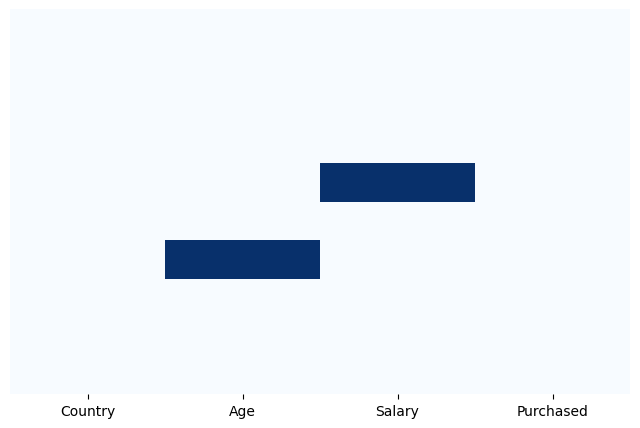

In [36]:
fig, ax = plt.subplots(figsize =(8,5))
sns.heatmap(data_df.isna(), cmap="Blues", cbar=False, yticklabels=False)

In [37]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [38]:
X = data_df.iloc[:, :-1].values #.values to convert to numpy array type
X


array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [39]:
y = data_df.iloc[:, -1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [51]:
from sklearn.impute import SimpleImputer

# Create an instance of Class SimpleImputer: np.nan is the empty value in the dataset
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:,1:3])

In [52]:
X


array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)